# 🔍 Article Ingestion Analysis for TTD Newsletter

This notebook is an interactive replicate of the article ingestion flow.

Find, test, and evaluate it with dummy data.

**You have to execute all steps in order to get proper result.**

**You should inspect the flow state at each step** to understand the flow.

## Flow

In [4]:
from metaflow import FlowSpec, step, Parameter
from pydantic import BaseModel, Field
from datetime import datetime

from ttd.utils.print import safe_pretty_print

class FlowParametersSchema(BaseModel):
    """Schema for flow parameters."""
    articles_table: str = Field(
        'articles', description="Table where to save articles"
    )
    articles_limit: int = Field(
        2, description="Maximum number of articles to load"
    )
    date_threshold: datetime = Field(
        'Thu, 03 Apr 2025 18:00:00 +0000',
        description="Keep articles published after this date'"
    )
    clean_tables: bool = Field(
        False, description="Clean tables (articles_table)"
    )
    class Config:
        extra = 'allow'
    pass

flow = FlowParametersSchema(
    articles_table='dummy_articles',
    articles_limit=1,
    clean_tables=True
)
safe_pretty_print(flow.model_dump())

{
    'articles_table': 'dummy_articles',
    'articles_limit': 1,
    'date_threshold': 'Thu, 03 Apr 2025 18:00:00 +0000',
    'clean_tables': True
}

### **1. Start step**
Init, config, parameters, tracks versioning...

In [5]:
from ttd.flows.article_ingestion.steps.start import execute as start_step

start_step(flow)
safe_pretty_print(flow.model_dump())

2025-05-12 10:08:02,070 - ttd.flows.article_ingestion.steps.start - INFO - ✅ Database first connection established.
2025-05-12 10:08:02,123 - ttd.flows.article_ingestion.steps.start - INFO - ✅ Database cleaned.
/Users/mathieucrilout/.miniconda3/envs/ttd/lib/python3.10/site-packages/pydantic/main.py:426: UserWarning: Pydantic serializer warnings:
  Expected `datetime` but got `str` with value `'Thu, 03 Apr 2025 18:00:00 +0000'` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


{
    'articles_table': 'dummy_articles',
    'articles_limit': 1,
    'date_threshold': 'Thu, 03 Apr 2025 18:00:00 +0000',
    'clean_tables': True,
    'config': {
        'data_dir': '/Users/mathieucrilout/Repos/train_tune_deploy/data',
        'db_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/ttd_tinydb.json',
        'feeds_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds.txt',
        'feeds_stealth_path': 
'/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds_stealth.txt'
    },
    'rss_feeds': [
        'https://www.aws.amazon.com/rss',
        'https://www.quantamagazine.org/feed',
        'https://www.eugeneyan.com/rss',
        'https://www.huyenchip.com/feed',
        'https://www.marktechpost.com/feed',
        'https://www.theverge.com/rss.xml',
        'https://www.techcrunch.com/feed',
        'https://www.arstechnica.com/feed',
        'https://www.theguardian.com/rss',
        'https://www.zdnet.com/rss.xml',
        'https://www.siliconangle.com/feed',
        'https://www.analyticsindiamag.com/feed',
        'https://www.venturebeat.com/feed',
        'https://www.blogs.nvidia.com/feed',
        'https://www.dagster.io/rss.xml',
        'https://www.philschmid.de/rss',
        'https://www.thegradient.pub/feed',
        'https://www.towardsdatascience.com/feed',
        'https://www.thenextweb.com/feed',
        'https://www.syncedreview.com/feed',
        'https://www.techrepublic.com/feed',
        'https://www.pyimagesearch.com/feed',
        'https://www.snorkel.ai/feed',
        'https://www.neptune.ai/feed',
        'https://www.arize.com/feed',
        'https://www.github.blog/feed',
        'https://www.csail.mit.edu/rss.xml'
    ],
    'rss_stealth_feeds': [
        'https://www.eetimes.com/feed',
        'https://www.anyscale.com/rss.xml',
        'https://www.kdnuggets.com/feed',
        'https://www.machinelearningmastery.com/feed'
    ],
    'git_metadata': {
        'git_commit': '3fcfb77e442259fa1929f110c86e49b051d10b34',
        'git_branch': 'dev',
        'git_repo': 'git@github.com:mcrilo33/train-tune-deploy.git'
    },
    'parsed_date_threshold': datetime.datetime(2025, 4, 3, 18, 0, tzinfo=tzutc()),
    'metrics': {},
    'errors': {}
}

### **2. Ingest RSS articles step**

In [9]:
from ttd.flows.article_ingestion.steps.ingest_rss_articles \
    import execute as load_articles_step

load_articles_step(flow)
safe_pretty_print(flow.model_dump())

2025-05-12 10:08:42,834 - ttd.flows.article_ingestion.steps.ingest_rss_articles - INFO - Ingesting RSS articles...
2025-05-12 10:08:42,837 - scrapy.utils.log - INFO - Scrapy 2.12.0 started (bot: scrapybot)
2025-05-12 10:08:42 [scrapy.utils.log] INFO: Scrapy 2.12.0 started (bot: scrapybot)
2025-05-12 10:08:42,838 - scrapy.utils.log - INFO - Versions: lxml 5.3.0.0, libxml2 2.13.5, cssselect 1.2.0, parsel 1.8.1, w3lib 2.1.2, Twisted 23.10.0, Python 3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:35:25) [Clang 16.0.6 ], pyOpenSSL 25.0.0 (OpenSSL 3.5.0 8 Apr 2025), cryptography 44.0.1, Platform macOS-15.2-arm64-arm-64bit
2025-05-12 10:08:42 [scrapy.utils.log] INFO: Versions: lxml 5.3.0.0, libxml2 2.13.5, cssselect 1.2.0, parsel 1.8.1, w3lib 2.1.2, Twisted 23.10.0, Python 3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:35:25) [Clang 16.0.6 ], pyOpenSSL 25.0.0 (OpenSSL 3.5.0 8 Apr 2025), cryptography 44.0.1, Platform macOS-15.2-arm64-arm-64bit
2025-05-12 10:08:42,839 - s

{
    'articles_table': 'dummy_articles',
    'articles_limit': 1,
    'date_threshold': 'Thu, 03 Apr 2025 18:00:00 +0000',
    'clean_tables': True,
    'config': {
        'data_dir': '/Users/mathieucrilout/Repos/train_tune_deploy/data',
        'db_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/ttd_tinydb.json',
        'feeds_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds.txt',
        'feeds_stealth_path': 
'/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds_stealth.txt'
    },
    'rss_feeds': [
        'https://www.aws.amazon.com/rss',
        'https://www.quantamagazine.org/feed',
        'https://www.eugeneyan.com/rss',
        'https://www.huyenchip.com/feed',
        'https://www.marktechpost.com/feed',
        'https://www.theverge.com/rss.xml',
        'https://www.techcrunch.com/feed',
        'https://www.arstechnica.com/feed',
        'https://www.theguardian.com/rss',
        'https://www.zdnet.com/rss.xml',
        'https://www.siliconangle.com/feed',
        'https://www.analyticsindiamag.com/feed',
        'https://www.venturebeat.com/feed',
        'https://www.blogs.nvidia.com/feed',
        'https://www.dagster.io/rss.xml',
        'https://www.philschmid.de/rss',
        'https://www.thegradient.pub/feed',
        'https://www.towardsdatascience.com/feed',
        'https://www.thenextweb.com/feed',
        'https://www.syncedreview.com/feed',
        'https://www.techrepublic.com/feed',
        'https://www.pyimagesearch.com/feed',
        'https://www.snorkel.ai/feed',
        'https://www.neptune.ai/feed',
        'https://www.arize.com/feed',
        'https://www.github.blog/feed',
        'https://www.csail.mit.edu/rss.xml'
    ],
    'rss_stealth_feeds': [
        'https://www.eetimes.com/feed',
        'https://www.anyscale.com/rss.xml',
        'https://www.kdnuggets.com/feed',
        'https://www.machinelearningmastery.com/feed'
    ],
    'git_metadata': {
        'git_commit': '3fcfb77e442259fa1929f110c86e49b051d10b34',
        'git_branch': 'dev',
        'git_repo': 'git@github.com:mcrilo33/train-tune-deploy.git'
    },
    'parsed_date_threshold': datetime.datetime(2025, 4, 3, 18, 0, tzinfo=tzutc()),
    'metrics': {
        'step_start_times': {
            'ingest_rss_articles': 1747037322.834636
        }
    },
    'errors': {}
}

### **3. Prepare Report**

Generate a detailed report from ingested articles.

To retrieve the report use the command :

```bash # python -m ttd.flows.article_ingestion.flow card get prepare_report article_ingestion_report_example.html```

Here is an example : [article_ingestion_report_example.html](./images/article_ingestion_report_example.html)

## Analysis

In [42]:
from ttd.storage.ttd_storage import TTDStorage

def get_articles_in_range(storage, table_name, first_id, last_id):
    """Fetch articles with ID between first_id and last_id (inclusive)."""
    articles = storage.get_all(table_name)
    articles = [article for article in articles if
                int(article.get("doc_id")) > first_id and
                int(article.get("doc_id")) <= last_id]

    return articles

def get_articles_with_no_error(articles):
    articles_with_no_error = []
    for article in articles:
        if not article.get("metadata", {}).get("error"):
            articles_with_no_error.append(article)

    return articles_with_no_error

storage = TTDStorage(flow.config.get("db_path"))
articles = get_articles_in_range(storage, "articles", 0, 1199)
articles_with_no_error = get_articles_with_no_error(articles)

### Check if paths in rss_feeds and rss_feeds_stealth are useful

In [46]:
from pathlib import Path
from collections import Counter
from ttd.ingestion.parser import extract_domain

def print_domain_matches(rss_file_path: Path, domain_counts: Counter, label: str = ""):
    print(f"\n📄 Checking {label or rss_file_path.name}:")
    with rss_file_path.open("r") as file:
        for line in file:
            url = line.strip()
            if not url:
                continue
            domain = extract_domain(url)
            count = domain_counts.get(domain, 0)
            if count > 0:
                print(f"[✅] Found: {domain} ({count} article(s))")
            else:
                print(f"[❌] Not found: {domain}")

domains = [article['url_domain'] for article in articles_with_no_error if article.get('url_domain')]
domain_counts = Counter(domains)
print("There are", len(domain_counts), "non-empty domains.")

rss_files = {
    "Regular RSS Feeds": Path("../data/rss_feeds.txt"),
    "Stealth RSS Feeds": Path("../data/rss_feeds_stealth.txt")
}
for label, path in rss_files.items():
    print_domain_matches(path, domain_counts, label=label)

There are 31 non-empty domains.

📄 Checking Regular RSS Feeds:
[✅] Found: aws.amazon.com (51 article(s))
[✅] Found: quantamagazine.org (5 article(s))
[✅] Found: eugeneyan.com (194 article(s))
[✅] Found: huyenchip.com (10 article(s))
[✅] Found: marktechpost.com (9 article(s))
[✅] Found: theverge.com (10 article(s))
[✅] Found: techcrunch.com (19 article(s))
[✅] Found: arstechnica.com (20 article(s))
[✅] Found: theguardian.com (132 article(s))
[✅] Found: zdnet.com (17 article(s))
[✅] Found: siliconangle.com (30 article(s))
[✅] Found: analyticsindiamag.com (30 article(s))
[✅] Found: venturebeat.com (28 article(s))
[✅] Found: blogs.nvidia.com (18 article(s))
[✅] Found: dagster.io (210 article(s))
[✅] Found: philschmid.de (157 article(s))
[✅] Found: thegradient.pub (15 article(s))
[✅] Found: towardsdatascience.com (9 article(s))
[✅] Found: thenextweb.com (10 article(s))
[✅] Found: syncedreview.com (10 article(s))
[✅] Found: techrepublic.com (20 article(s))
[✅] Found: pyimagesearch.com (9 art

### Field Coverage

In [48]:
from collections import Counter

def print_field_coverage(articles):
    total = len(articles)
    if total == 0:
        print("No articles to process.")
        return

    field_counts = Counter()

    for article in articles:
        for field, value in article.items():
            if value not in (None, '', [], {}):
                field_counts[field] += 1

    print(f"\n📊 Field Coverage Report ({total} articles):\n")
    for field in sorted(field_counts):
        count = field_counts[field]
        percent = (count / total) * 100
        print(f"{field:20} : {count:4} / {total} ({percent:.1f}%)")

print_field_coverage(articles_with_no_error)


📊 Field Coverage Report (1199 articles):

author               :  588 / 1199 (49.0%)
created_at           : 1199 / 1199 (100.0%)
doc_id               : 1199 / 1199 (100.0%)
execution_time       : 1199 / 1199 (100.0%)
html_content_artifact : 1199 / 1199 (100.0%)
html_content_length  : 1199 / 1199 (100.0%)
last_updated         : 1199 / 1199 (100.0%)
published_date       : 1199 / 1199 (100.0%)
summary              : 1174 / 1199 (97.9%)
summary_length       : 1199 / 1199 (100.0%)
summary_path         :    8 / 1199 (0.7%)
summary_text_ratio   : 1199 / 1199 (100.0%)
table_name           : 1199 / 1199 (100.0%)
tags                 :  561 / 1199 (46.8%)
text_content_artifact : 1199 / 1199 (100.0%)
text_content_length  : 1199 / 1199 (100.0%)
title                : 1199 / 1199 (100.0%)
url                  : 1199 / 1199 (100.0%)
url_domain           : 1199 / 1199 (100.0%)


### Summary Analysis


📊 Comparison of Content Sizes (top 50 by html_content length):
URL                                                |   HTML |   Text |  Summary
--------------------------------------------------------------------------------
https://www.theguardian.com/news/audio/2025/apr/03 | 296373 |   1169 |      867
https://www.theguardian.com/info/2016/sep/02/sign- | 248133 |    684 |      483
https://www.theguardian.com/environment/video/2025 | 392825 |    784 |      537
https://www.theguardian.com/world/video/2025/mar/0 | 289850 |   1187 |      805
https://www.theguardian.com/world/video/2025/mar/3 | 282707 |    975 |      661
https://www.theguardian.com/us-news/video/2025/apr | 291016 |    879 |      584
https://www.theguardian.com/global/2022/sep/20/sig | 258005 |    728 |      474
https://www.theguardian.com/us-news/video/2025/mar | 281361 |   1071 |      696
https://www.theguardian.com/world/video/2025/mar/0 | 281855 |    777 |      502
https://www.theguardian.com/environment/video/2025 | 28

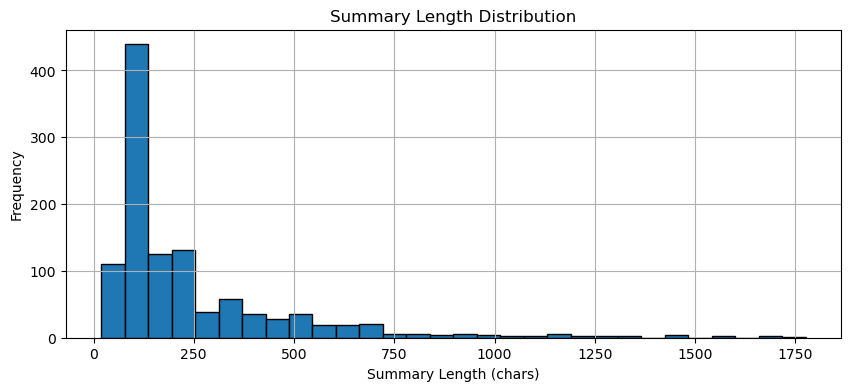

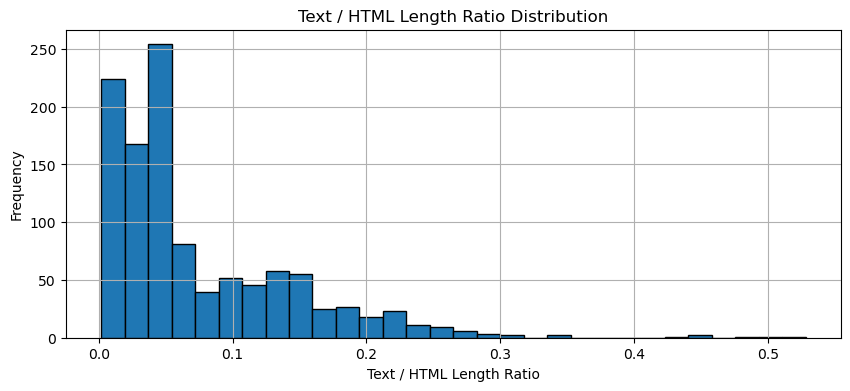

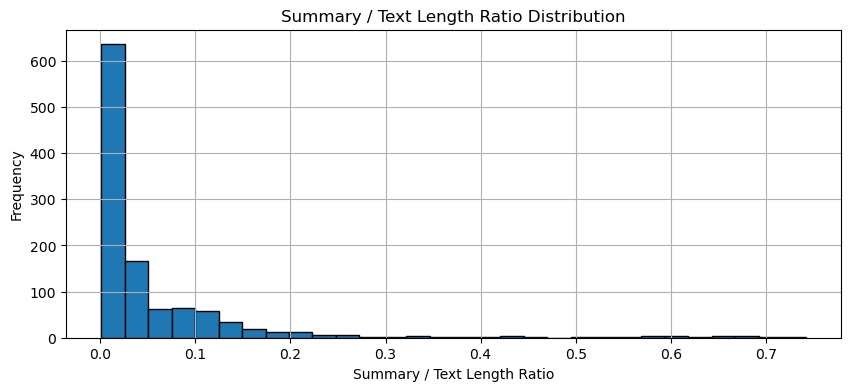

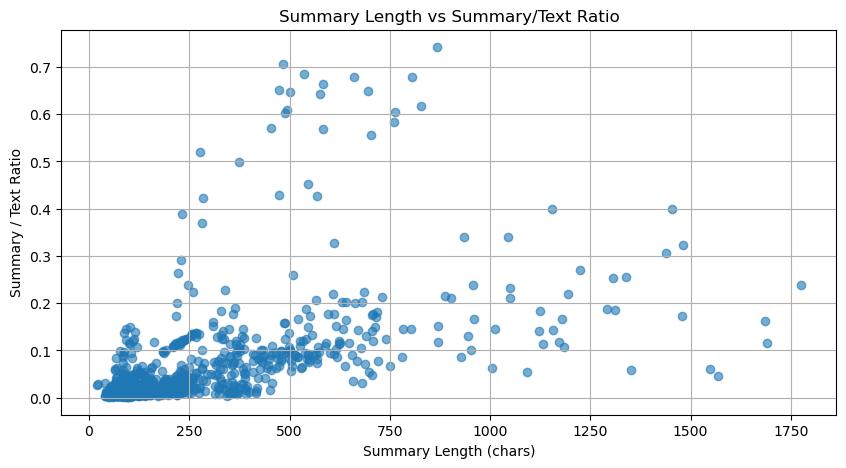

In [53]:
import matplotlib.pyplot as plt

def compare_content_sizes(articles, storage):
    results = []
    summary_lengths = []
    text_html_ratios = []
    summary_text_ratios = []

    for article in articles:
        try:
            html_len = article['html_content_length']
            text_len = article['text_content_length']
            summary_len = article['summary_length']
            summary_text_ratio = article['summary_text_ratio']

            if summary_text_ratio < 0.8:
                results.append({
                    "url": article.get("url"),
                    "html_len": html_len,
                    "text_len": text_len,
                    "summary_len": summary_len,
                    "summary_text_ratio": summary_len / text_len
                })

                if summary_len > 0 and html_len > 0 and text_len > 0:
                    summary_lengths.append(summary_len)
                    text_html_ratios.append(text_len / html_len)
                    summary_text_ratios.append(summary_len / text_len)

        except Exception as e:
            print(f"⚠️ Error processing article: {article.get('url')} - {e}")

    # Print comparison table
    results.sort(key=lambda x: x["summary_text_ratio"], reverse=True)
    print(f"\n📊 Comparison of Content Sizes (top 50 by html_content length):")
    print(f"{'URL':50} | {'HTML':>6} | {'Text':>6} | {'Summary':>8}")
    print("-" * 80)
    for r in results[:50]:
        print(f"{r['url'][:50]:50} | {r['html_len']:6} | {r['text_len']:6} | {r['summary_len']:8}")

    # Plot summary length distribution
    plt.figure(figsize=(10, 4))
    plt.hist(summary_lengths, bins=30, edgecolor='black')
    plt.title("Summary Length Distribution")
    plt.xlabel("Summary Length (chars)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # Plot text/html ratio
    plt.figure(figsize=(10, 4))
    plt.hist(text_html_ratios, bins=30, edgecolor='black')
    plt.title("Text / HTML Length Ratio Distribution")
    plt.xlabel("Text / HTML Length Ratio")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # Plot summary/text ratio
    plt.figure(figsize=(10, 4))
    plt.hist(summary_text_ratios, bins=30, edgecolor='black')
    plt.title("Summary / Text Length Ratio Distribution")
    plt.xlabel("Summary / Text Length Ratio")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # Scatter plot: summary_length vs summary_text_ratio
    plt.figure(figsize=(10, 5))
    plt.scatter(summary_lengths, summary_text_ratios, alpha=0.6)
    plt.title("Summary Length vs Summary/Text Ratio")
    plt.xlabel("Summary Length (chars)")
    plt.ylabel("Summary / Text Ratio")
    plt.grid(True)
    plt.show()

    return results

results = compare_content_sizes(articles_with_no_error, storage)

### TAGs Analysis

In [54]:
from collections import Counter

def count_all_tags(articles):
    tag_counter = Counter()
    for article in articles:
        tags = article.get("tags", [])
        if isinstance(tags, list):
            tag_counter.update(tags)
    return tag_counter

# Run and display
tag_counts = count_all_tags(articles_with_no_error)
print("There are ", len(tag_counts), "different tags :")
print("\n🏷️ Most Common Tags:")
for tag, count in tag_counts.most_common(100):  # change number to see more
    print(f"{tag:20} : {count}")

There are  1595 different tags :

🏷️ Most Common Tags:
LLMs                 : 66
NLP                  : 66
Data Development     : 63
AI                   : 57
Foundation Models    : 57
Fine-Tuning          : 52
Data Labeling        : 42
Applied AI           : 40
Artificial Intelligence : 38
World news           : 38
UK news              : 36
Data-Centric AI      : 35
Data development     : 33
Business             : 30
NEWS                 : 30
US news              : 29
Evaluation           : 29
Research             : 28
Donald Trump         : 26
Machine Learning     : 25
The-Latest           : 23
Product              : 23
News                 : 22
Alignment            : 22
Trump tariffs        : 21
AI News              : 21
Tariffs              : 19
Security             : 19
Culture              : 19
RAG                  : 18
GamesBeat            : 17
Environment          : 16
Life and style       : 16
Product Releases     : 16
Technology           : 15
Generative AI        : 15
Trump 

#### Quick test synonyms detection

In [66]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

from ttd.models.loader import load_model_spec

def find_strong_synonyms(
    tag_counts,              # dict or Counter: tag -> count
    embedding_model,         # Must have .predict(list_of_tags) method
    threshold: float = 0.92,
    lower: bool = True
):
    # 1. Normalize tag keys and merge frequencies
    normalized_counts = {}
    original_forms = {}  # normalized_tag -> list of (original_tag, count)
    for tag, count in tag_counts:
        tag_key = tag.lower() if lower else tag
        normalized_counts[tag_key] = normalized_counts.get(tag_key, 0) + count
        original_forms.setdefault(tag_key, []).append((tag, count))

    tags = list(normalized_counts.keys())

    # 2. Embed using the model (with internal cache)
    embeddings = {tag:embedding_model.predict(tag)["output"] for tag in tags}

    names = list(embeddings.keys())
    vectors = np.array([embeddings[name] for name in names])
    sim_matrix = cosine_similarity(vectors)

    # 4. Group synonyms
    tag_synonyms = []
    assigned_tags = set()

    for i, tag in enumerate(names):
        if tag in assigned_tags:
            continue

        group_members = [(tag, normalized_counts.get(tag, 1))]
        for j, other_tag in enumerate(names):
            if i != j and other_tag not in assigned_tags and sim_matrix[i][j] >= threshold:
                group_members.append((other_tag, normalized_counts.get(other_tag, 1)))
                assigned_tags.add(other_tag)

        group_members = sorted(group_members, key=lambda x: -x[1])
        main_tag, main_count = group_members[0]
        synonyms = [
            {"tag": tag_, "count": count_}
            for tag_, count_ in group_members[1:]
        ]

        tag_synonyms.append({
            "name": main_tag,
            "count": main_count,
            "synonyms": synonyms
        })
        assigned_tags.update(tag_ for tag_, _ in group_members)

    return tag_synonyms

tag_embedding_spec = load_model_spec("tag_embedding_spec")
tags = tag_counts.most_common(100)
results = find_strong_synonyms(
    tags,
    tag_embedding_spec._loaded_model,
    threshold=0.6,
    lower=False
)
for group in results:
    print(group)

2025-05-13 10:47:47,976 - httpx - DEBUG - load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-13 10:47:47 [httpx] DEBUG: load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-13 10:47:47,977 - httpx - DEBUG - load_verify_locations cafile='/Users/mathieucrilout/.miniconda3/envs/ttd/lib/python3.10/site-packages/certifi/cacert.pem'
2025-05-13 10:47:47 [httpx] DEBUG: load_verify_locations cafile='/Users/mathieucrilout/.miniconda3/envs/ttd/lib/python3.10/site-packages/certifi/cacert.pem'


{'name': 'LLMs', 'count': 66, 'synonyms': [{'tag': 'LLMOps', 'count': 12}]}
{'name': 'NLP', 'count': 66, 'synonyms': []}
{'name': 'Data Development', 'count': 63, 'synonyms': [{'tag': 'Data development', 'count': 33}]}
{'name': 'AI', 'count': 57, 'synonyms': [{'tag': 'Applied AI', 'count': 40}, {'tag': 'Artificial Intelligence', 'count': 38}, {'tag': 'AI News', 'count': 21}, {'tag': 'AI (Artificial Intelligence)', 'count': 6}]}
{'name': 'Foundation Models', 'count': 57, 'synonyms': []}
{'name': 'Fine-Tuning', 'count': 52, 'synonyms': []}
{'name': 'Data Labeling', 'count': 42, 'synonyms': []}
{'name': 'World news', 'count': 38, 'synonyms': [{'tag': 'UK news', 'count': 36}, {'tag': 'US news', 'count': 29}]}
{'name': 'Data-Centric AI', 'count': 35, 'synonyms': [{'tag': 'AI, ML and Deep Learning', 'count': 9}]}
{'name': 'Business', 'count': 30, 'synonyms': []}
{'name': 'NEWS', 'count': 30, 'synonyms': [{'tag': 'News', 'count': 22}]}
{'name': 'Evaluation', 'count': 29, 'synonyms': []}
{'nam

### Date Analysis

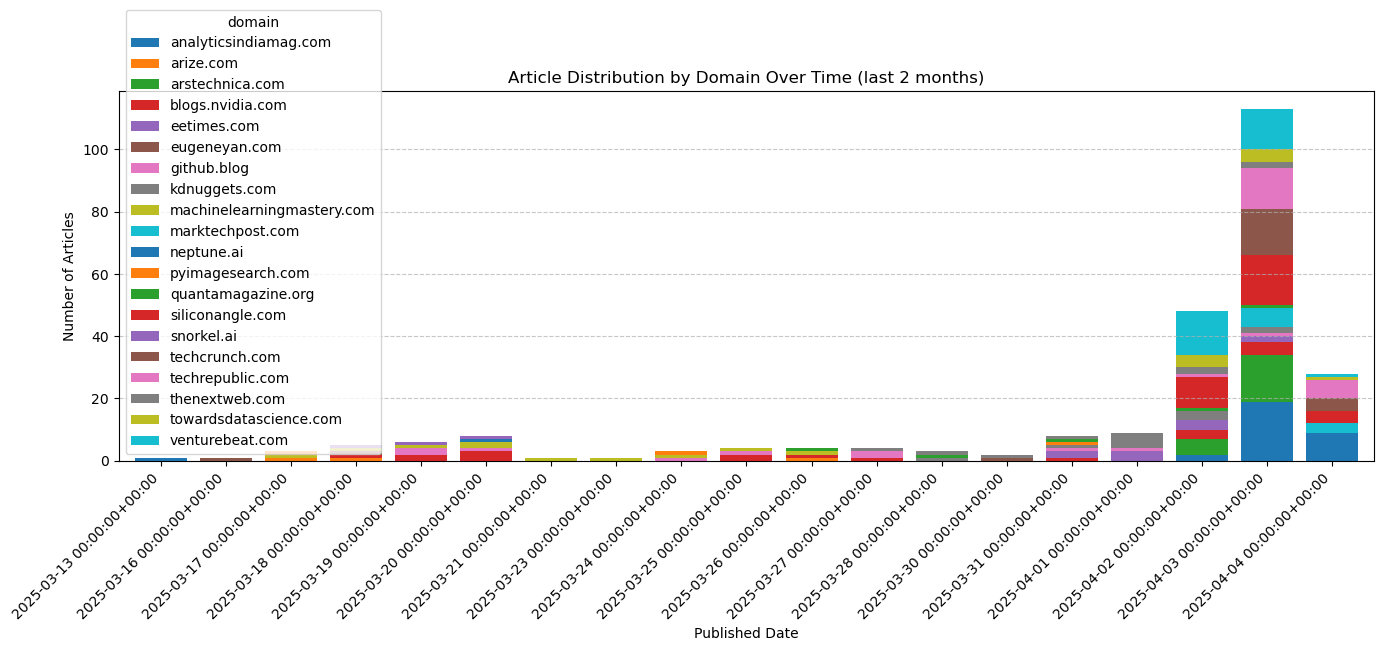

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta

def plot_article_distribution_by_domain_over_time(
    articles: list,
    n_months: int = None
):
    # 1) Parse dates and collect records
    records = []
    for art in articles:
        date_str = art.get("published_date")
        domain   = art.get("url_domain", "unknown")
        try:
            dt = datetime.strptime(date_str, "%a, %d %b %Y %H:%M:%S %z")
            records.append({"date": dt, "domain": domain})
        except Exception:
            continue

    # 2) Build DataFrame
    df = pd.DataFrame(records)
    if df.empty:
        print("No valid dates found.")
        return

    # 3) Filter to last n_months if requested
    if n_months is not None:
        cutoff = datetime.now(df["date"].dt.tz) - relativedelta(months=n_months)
        df = df[df["date"] >= cutoff]
        if df.empty:
            print(f"No articles in the last {n_months} months.")
            return

    # 4) Group and plot
    df.set_index("date", inplace=True)
    grouped = df.groupby([pd.Grouper(freq="D"), "domain"]).size().unstack(fill_value=0)

    ax = grouped.plot(
        kind="bar",
        stacked=True,
        figsize=(14, 6),
        width=0.8
    )
    subtitle = f" (last {n_months} months)" if n_months is not None else ""
    ax.set_title(f"Article Distribution by Domain Over Time{subtitle}")
    ax.set_xlabel("Published Date")
    ax.set_ylabel("Number of Articles")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

plot_article_distribution_by_domain_over_time(articles_with_no_error, n_months=2)

## Sandbox to try stuff

In [10]:
flow.config.get("db_path")

'/Users/mathieucrilout/Repos/train_tune_deploy/data/ttd_tinydb.json'

In [14]:
from ttd.storage.ttd_storage import TTDStorage

storage = TTDStorage(flow.config.get("db_path"))
storage.get_all('ingestions')[-1]

{'articles_table': 'dummy_articles',
 'articles_limit': 10,
 'date_threshold': 'Thu, 03 Apr 2025 18:00:00 +0000',
 'rss_article_scraper': 12,
 'stealth_rss_article_scraper': 10,
 'first_id': 0,
 'last_id': 22,
 'duration': 45.57524585723877,
 'table_name': 'ingestions',
 'created_at': '2025-05-12T17:43:35.426899',
 'doc_id': '5'}

In [12]:
storage.get_all(flow.articles_table)

[{'title': 'Seven Key Advantages of Implementing eFPGA with Soft IP vs. Hard IP',
  'author': 'Menta',
  'published_date': 'Mon, 12 May 2025 13:00:00 +0000',
  'url_domain': 'eetimes.com',
  'url': 'https://www.eetimes.com/seven-key-advantages-of-implementing-efpga-with-soft-ip-vs-hard-ip/',
  'summary': '<p>This article clearly demonstrates the convincing advantages of implementing eFPGA as a soft IP solution rather than a hard IP approach</p>\n<p>The post <a href="https://www.eetimes.com/seven-key-advantages-of-implementing-efpga-with-soft-ip-vs-hard-ip/">Seven Key Advantages of Implementing eFPGA with Soft IP vs. Hard IP\xa0\xa0</a> appeared first on <a href="https://www.eetimes.com">EE Times</a>.</p>',
  'tags': ['Sponsored content'],
  'metadata': {'error': {'status': 'ERR_HTTP2_PROTOCOL_ERROR',
    'url': 'https://www.eetimes.com/seven-key-advantages-of-implementing-efpga-with-soft-ip-vs-hard-ip/'},
   'duration': 0},
  'table_name': 'dummy_articles',
  'created_at': '2025-05-12T

In [39]:
articles = storage.get_all("articles")